#### Importing libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
sns.set_theme()

# Set custom matplotlib default font
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['mathtext.fontset'] = 'stix'
pd.set_option('display.max_columns', 40)

#### Loading data from csv

In [3]:
df = pd.read_csv('dataset/PS_2022.11.03.csv', skiprows=38)
df.drop(df.columns[0], axis=1, inplace=True)

df.sample(4)

,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_locale,disc_facility,disc_telescope,pl_orbper,pl_orbsmax,pl_rade,pl_bmasse,pl_orbeccen,pl_eqt,pl_orbincl,pl_trandur,st_spectype,st_teff,st_rad,st_mass,st_met,st_metratio,st_lum,st_logg,st_age,st_dens,st_vsin,sy_dist,sy_vmag,sy_kmag,sy_gaiamag
12052,Kepler-1496 b,Kepler-1496,1,1,Transit,2016,Space,Kepler,0.95 m Kepler Telescope,64.658802,0.3255,1.79,NaN,0.0,487.0,89.95,7.5490,NaN,6197.0,1.03,1.10,-0.08,[Fe/H],NaN,4.45,NaN,1.2956,NaN,1307.660,14.832,13.225,14.6819
5516,KOI-94 e,KOI-94,2,4,Transit,2013,Space,Kepler,0.95 m Kepler Telescope,54.319986,0.2885,5.79,NaN,0.0,570.0,89.95,8.4652,NaN,6098.0,1.30,1.08,-0.02,[Fe/H],NaN,4.25,NaN,0.8505,NaN,477.052,12.314,10.926,12.1882
10530,Kepler-1370 b,Kepler-1370,1,2,Transit,2016,Space,Kepler,0.95 m Kepler Telescope,20.264168,0.1563,1.77,NaN,0.0,793.0,89.95,4.2850,NaN,6292.0,1.28,1.25,0.16,[Fe/H],NaN,4.32,NaN,2.2336,NaN,1004.100,13.718,12.349,13.6743
27817,Kepler-718 b,Kepler-718,1,1,Transit,2016,Space,Kepler,0.95 m Kepler Telescope,2.052350,0.0310,11.50,NaN,0.0,1440.0,87.66,2.0540,NaN,5875.0,0.96,0.97,NaN,NaN,NaN,4.46,4.0,NaN,NaN,1302.330,15.399,13.604,15.2456


#### 1. Exoplanets Dataframe

In [4]:
df_planets = df[[
    'pl_name', 'hostname', 'discoverymethod', 'disc_year', 'disc_locale', 'disc_facility', 
    'disc_telescope', 'pl_orbper', 'pl_bmasse', 'pl_orbeccen', 'pl_eqt'
]]

df_planets = df_planets.drop_duplicates(subset=['pl_name'])

print('Confirmed Exoplanets:', df_planets.shape[0])

Confirmed Exoplanets: 5197


#### 2. Host stars Dataframe

In [5]:
df_stars = df[[
    'hostname', 'sy_snum', 'sy_pnum', 'st_spectype', 'st_teff', 
    'st_mass', 'st_met', 'st_metratio', 'st_lum', 'st_age', 'sy_dist'
]]

df_stars = df_stars.drop_duplicates(subset=['hostname'])

print('Confirmed Planetary Systems:', df_stars.shape[0])

Confirmed Planetary Systems: 3888


#### 1.1 Plotting - Exoplanet detections per year

In [6]:
df_planets_per_year = df_planets.groupby(['disc_year'])['pl_name'].count().reset_index()
df_planets_per_year.columns = ['year', 'planets_discovered']

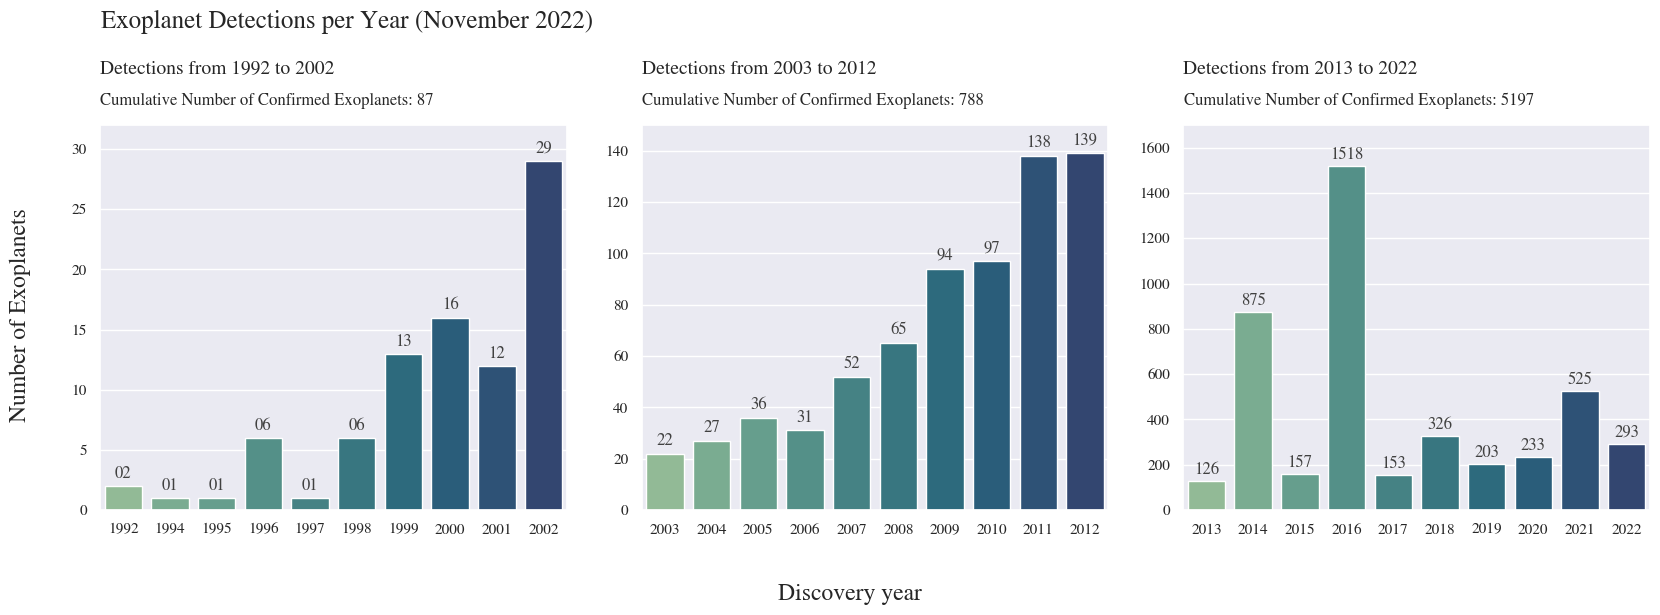

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
fig.subplots_adjust(wspace=0.16)

sns.barplot(ax=ax[0], data=df_planets_per_year[:10], x='year', y='planets_discovered', palette='crest')
sns.barplot(ax=ax[1], data=df_planets_per_year[10:20], x='year', y='planets_discovered', palette='crest')
sns.barplot(ax=ax[2], data=df_planets_per_year[20:30], x='year', y='planets_discovered', palette='crest')

fig.suptitle('Exoplanet Detections per Year (November 2022)', x=0.2485, y=1.11, size=18)
fig.supxlabel('Discovery year', y=-0.08, size=17)
fig.supylabel('Number of Exoplanets', x=0.08, size=17)

ax[0].set_title('Detections from 1992 to 2002', y=1.11, size=14, loc='left')
ax[1].set_title('Detections from 2003 to 2012', y=1.11, size=14, loc='left')
ax[2].set_title('Detections from 2013 to 2022', y=1.11, size=14, loc='left')

for i in range(3):
    ax[i].xaxis.label.set_visible(False)
    ax[i].yaxis.label.set_visible(False)
    
    for p in ax[i].patches:  
        text_y = 5 if i==1 else 1
        if i==2: text_y = 50
            
        ax[i].text(p.get_x() + p.get_width()/2, p.get_height() + text_y, f'{int(p.get_height()):02d}', 
                   ha='center', va='center', color='#414141')

ax[0].set_ylim(0, 32)
ax[1].set_ylim(0, 150)
ax[2].set_ylim(0, 1700)

fig.text(0.125, 0.92, f'Cumulative Number of Confirmed Exoplanets: {df_planets_per_year.iloc[:10, 1].sum()}')
fig.text(0.396, 0.92, f'Cumulative Number of Confirmed Exoplanets: {df_planets_per_year.iloc[:20, 1].sum()}')
fig.text(0.667, 0.92, f'Cumulative Number of Confirmed Exoplanets: {df_planets_per_year.iloc[:30, 1].sum()}')

plt.show()
fig.savefig('Exoplanet Detections per Year (Nov 2022).png', bbox_inches='tight', pad_inches=0.3, dpi=140)

#### 1.2 Plotting - Exoplanet detections per discovery method

In [8]:
df_planets_per_dm = df_planets.groupby(['discoverymethod'])['pl_name'].count().reset_index()
df_planets_per_dm.columns = ['discovery_method', 'planets_discovered']
df_planets_per_dm.sort_values(by=['planets_discovered'], inplace=True)

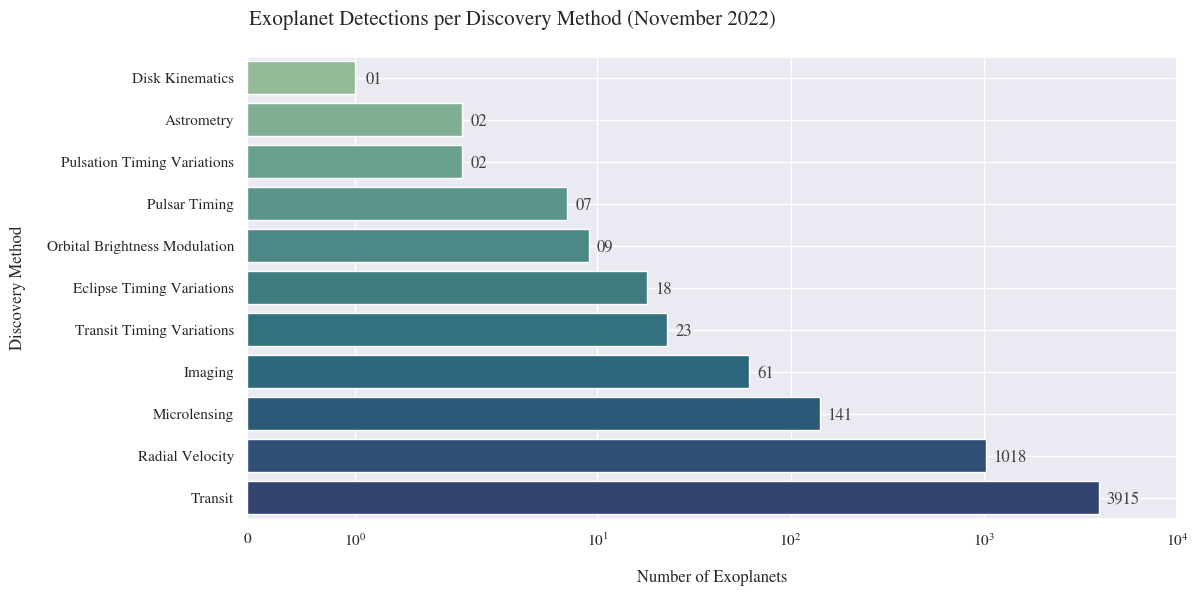

In [9]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.barplot(data=df_planets_per_dm, y='discovery_method', x='planets_discovered', palette='crest')

ax.set_title('Exoplanet Detections per Discovery Method (November 2022)', x=0.285, y=1.05, size=15)
ax.set_xlabel('Number of Exoplanets', labelpad=15)
ax.set_ylabel('Discovery Method', labelpad=15)

for p in ax.patches:  
    ax.text(p.get_width()*1.1, p.get_y()+0.55, f'{int(p.get_width()):02d}', color='#414141')
        
plt.xscale('symlog')
ax.set_xlim(0, 10000)
plt.grid(True)

plt.show()
fig.savefig('Exoplanet Detections per Discovery Method (Nov 2022).png', bbox_inches='tight', pad_inches=0.3, dpi=140)

#### 1.3 Plotting - Exoplanets orbital eccentricity distribution

Eccentricity: Amount by which the orbit of the planet deviates from a perfect circle.

In [10]:
df_pl_ecc = df_planets.copy()

planets_with_missing_ecc = df_pl_ecc['pl_orbeccen'].isna().sum()
planets_with_known_ecc = df_pl_ecc.shape[0] - planets_with_missing_ecc

df_pl_ecc.dropna(subset=['pl_orbeccen'], inplace=True)

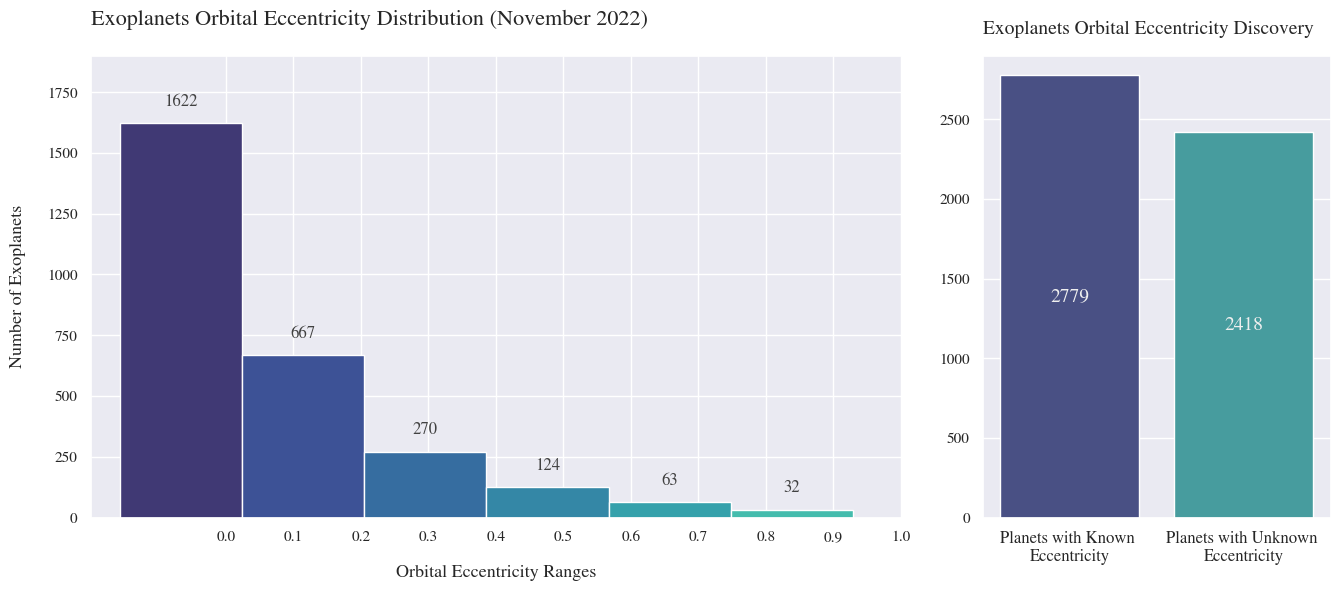

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [.70, .30]})
fig.subplots_adjust(wspace=0.14)

sns.histplot(ax=ax[0], data=df_pl_ecc, x='pl_orbeccen', bins=8)

ax[0].set_title('Exoplanets Orbital Eccentricity Distribution (November 2022)', loc='left', pad=22, size=16)

ax[0].set_xlabel('Orbital Eccentricity Ranges', labelpad=15, size=13)
ax[0].set_ylabel('Number of Exoplanets', labelpad=15, size=13)
ax[0].set_xlim(-0.2)
ax[0].set_xticks(np.arange(0, 1.1, 0.1))
ax[0].set_ylim(0, 1900)

for p in ax[0].patches:
    ax[0].annotate(
        p.get_height(), (p.get_x()+p.get_width()/2, p.get_height()+90), 
        ha='center', va='center', color='#414141'
    )
    
sns.barplot(
    ax=ax[1], x=['Planets with Known \nEccentricity', 'Planets with Unknown \nEccentricity'], 
    y=[planets_with_known_ecc, planets_with_missing_ecc], palette='mako'
)

ax[1].set_title('Exoplanets Orbital Eccentricity Discovery', loc='left', pad=16, size=14)
ax[1].tick_params(axis='x', labelsize=12)
ax[1].set_ylim(0, 2900)

for p in ax[1].patches:
    ax[1].annotate(
        f'{int(p.get_height()):d}', (p.get_x()+p.get_width()/2, p.get_height()/2), 
        ha='center', va='center', color='#efefef', size=14
    )
    
for bin_,i in zip(ax[0].patches, sns.color_palette('mako', 10)):
    bin_.set_facecolor(i)

plt.show()
fig.savefig('Exoplanets Orbital Eccentricity Distribution (Nov 2022).png', bbox_inches='tight', pad_inches=0.3, dpi=140)
plt.show()  

#### 2.1 Plotting - Planetary Systems per number of orbiting planets

In [12]:
df_ps_per_number_of_planets = df_stars.groupby(['sy_pnum'])['hostname'].count().reset_index()
df_ps_per_number_of_planets.columns = ['number_of_planets', 'number_of_ps']

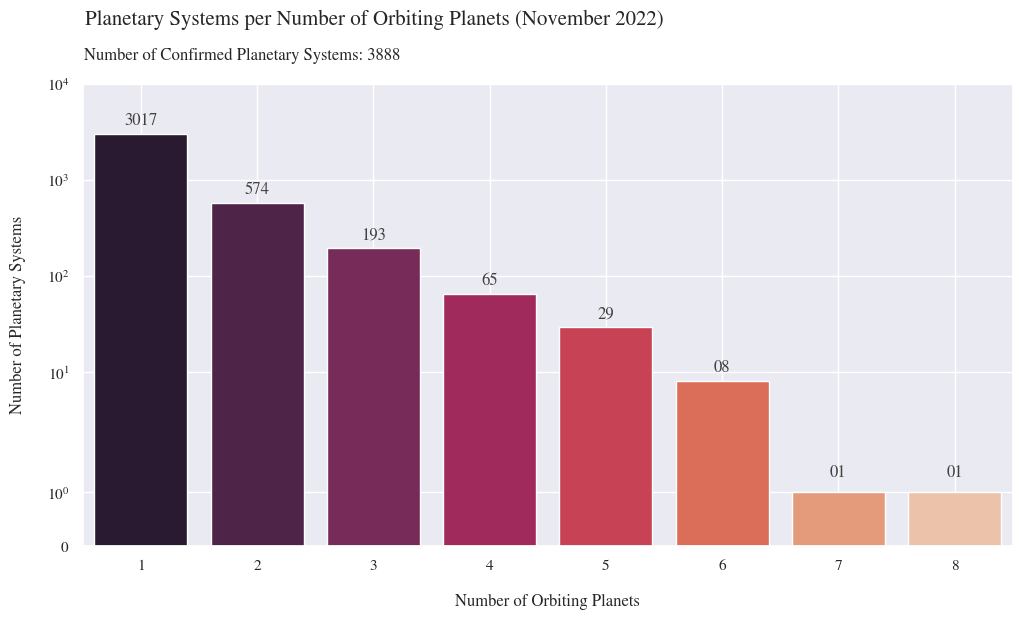

In [13]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.barplot(data=df_ps_per_number_of_planets, x='number_of_planets', y='number_of_ps', palette='rocket')

ax.set_title('Planetary Systems per Number of Orbiting Planets (November 2022)', x=0.314, y=1.11, size=15)
ax.set_xlabel('Number of Orbiting Planets', labelpad=15)
ax.set_ylabel('Number of Planetary Systems', labelpad=15)

for p in ax.patches:  
    ax.text(p.get_x() + p.get_width()/2, p.get_height()*1.38, f'{int(p.get_height()):02d}', 
               ha='center', va='center', color='#414141')

plt.yscale('symlog')
ax.set_ylim(0, 10000)

fig.text(0.126, 0.92, f'Number of Confirmed Planetary Systems: {df_stars.shape[0]}')

plt.grid(True) 
plt.show()
fig.savefig('Planetary Systems per Number of Orbiting Planets (Nov 2022).png', bbox_inches='tight', pad_inches=0.3, dpi=140)

#### 2.2 Plotting - Planetary Systems stellar age distribution

Stellar age: The age of the host star.

In [14]:
df_stellar_age = df_stars.copy()

stars_with_missing_age = df_stellar_age['st_age'].isna().sum()
stars_with_known_age = df_stellar_age.shape[0] - stars_with_missing_age

df_stellar_age.dropna(subset=['st_age'], inplace=True)

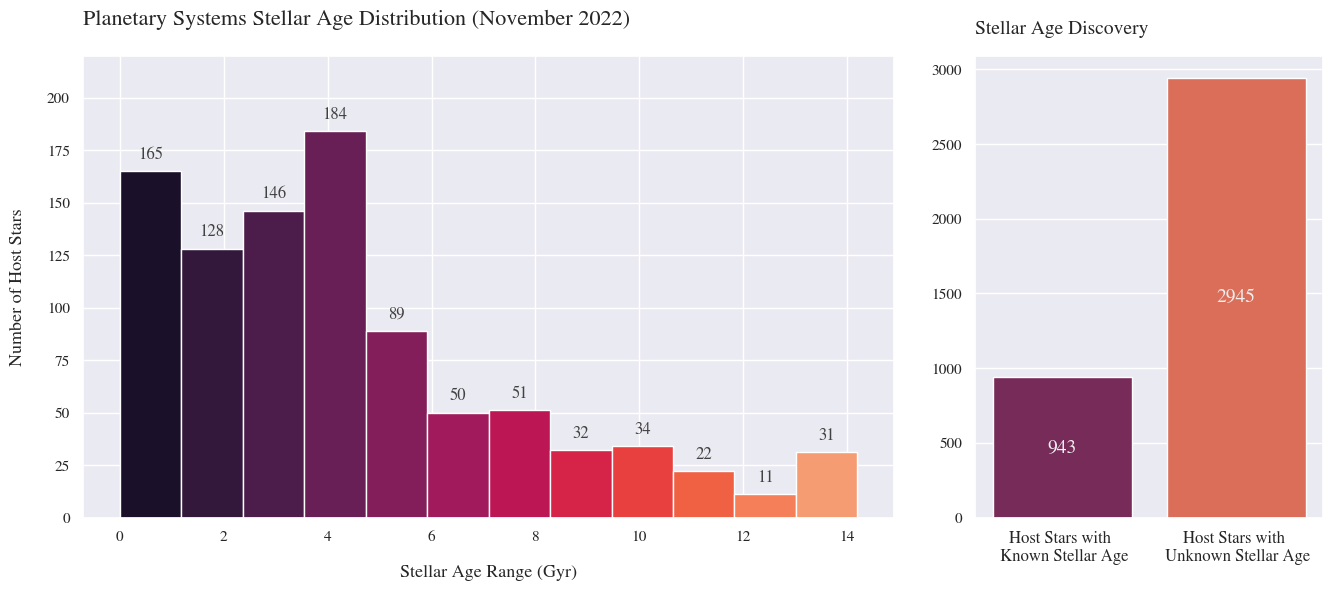

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [.70, .30]})
fig.subplots_adjust(wspace=0.14)

sns.histplot(ax=ax[0], data=df_stellar_age, x='st_age', bins=12)

ax[0].set_title('Planetary Systems Stellar Age Distribution (November 2022)', loc='left', pad=22, size=16)

ax[0].set_xlabel('Stellar Age Range (Gyr)', labelpad=15, size=13)
ax[0].set_ylabel('Number of Host Stars', labelpad=15, size=13)
ax[0].set_ylim(0, 220)

for p in ax[0].patches:
    ax[0].annotate(
        p.get_height(), (p.get_x()+p.get_width()/2, p.get_height()+8), 
        ha='center', va='center', color='#414141'
    )
    
sns.barplot(
    ax=ax[1], x=['Host Stars with \n Known Stellar Age', 'Host Stars with \n Unknown Stellar Age'], 
    y=[stars_with_known_age, stars_with_missing_age], palette='rocket'
)

ax[1].set_title('Stellar Age Discovery', loc='left', pad=16, size=14)

ax[1].tick_params(axis='x', labelsize=12)

for p in ax[1].patches:
    ax[1].annotate(
        f'{int(p.get_height()):d}', (p.get_x()+p.get_width()/2, p.get_height()/2), 
        ha='center', va='center', color='#efefef', size=14
    )
    
for bin_,i in zip(ax[0].patches, sns.color_palette('rocket', 14)):
    bin_.set_facecolor(i)

plt.show()
fig.savefig('Planetary Systems Stellar Age Distribution (Nov 2022).png', bbox_inches='tight', pad_inches=0.3, dpi=140)
plt.show()  

#### 2.3 Plotting - Stellar Metallicity Distribution

Stellar Metallicityi: Measurement of the metal content of the photosphere of the star as compared to the hydrogen content.

In [16]:
df_stellar_met = df_stars.copy()

stars_with_missing_metallicity = df_stellar_met['st_met'].isna().sum()
stars_with_known_metallicity = df_stellar_met.shape[0] - stars_with_missing_metallicity

df_stellar_met.dropna(subset=['st_met'], inplace=True)

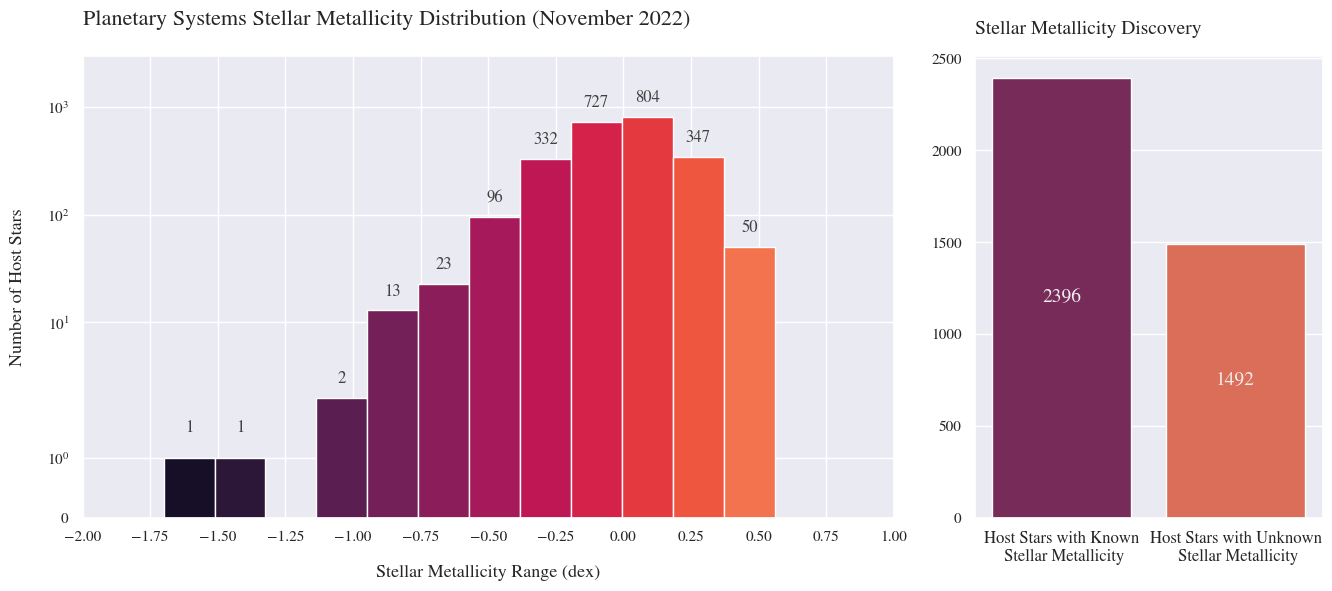

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [.70, .30]})
fig.subplots_adjust(wspace=0.14)

sns.histplot(ax=ax[0], data=df_stellar_met, x='st_met', bins=12)

ax[0].set_title('Planetary Systems Stellar Metallicity Distribution (November 2022)', loc='left', pad=22, size=16)

ax[0].set_xlabel('Stellar Metallicity Range (dex)', labelpad=15, size=13)
ax[0].set_ylabel('Number of Host Stars', labelpad=15, size=13)
ax[0].set_ylim(0, 3000)
ax[0].set_yscale('symlog')
ax[0].set_xticks(np.arange(-2, 1.2, 0.25))


for p in ax[0].patches:
    if p.get_height()!=0:
        ax[0].annotate(
            p.get_height(), (p.get_x()+p.get_width()/2, p.get_height() *1.5), 
            ha='center', va='center', color='#414141'
        )
    
sns.barplot(
    ax=ax[1], x=['Host Stars with Known\n Stellar Metallicity', 'Host Stars with Unknown\n Stellar Metallicity'], 
    y=[stars_with_known_metallicity, stars_with_missing_metallicity], palette='rocket'
)

ax[1].set_title('Stellar Metallicity Discovery', loc='left', pad=16, size=14)

ax[1].tick_params(axis='x', labelsize=12)

for p in ax[1].patches:
    ax[1].annotate(
        f'{int(p.get_height()):d}', (p.get_x()+p.get_width()/2, p.get_height()/2), 
        ha='center', va='center', color='#efefef', size=14
    )
    
for bin_,i in zip(ax[0].patches, sns.color_palette('rocket', 16)):
    bin_.set_facecolor(i)

plt.show()
fig.savefig('Planetary Systems Stellar Metallicity Distribution (Nov 2022).png', 
            bbox_inches='tight', pad_inches=0.3, dpi=140)
plt.show()  